In [332]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [333]:
Z = np.array([[0,0,0,0,0,0],
     [0,0,0,0,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,1],
     [0,0,0,1,0,0],
     [0,0,0,0,0,0]])

In [334]:
def init():
    plot.set_data(Z)
    return [plot]

In [335]:
def update(*args):
    plot.set_data(Z)
    N = np.zeros(Z.shape, dtype=int)
    N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2] + Z[1:-1,2:] + Z[2:  , :-2] 
                + Z[2:  ,1:-1] + Z[2:  ,2:])
    birth = (N==3)[1:-1,1:-1] & (Z[1:-1,1:-1]==0)
    survive = ((N==2) | (N==3))[1:-1,1:-1] & (Z[1:-1,1:-1]==1)
    Z[...] = 0
    Z[1:-1,1:-1][birth | survive] = 1
    return [plot]

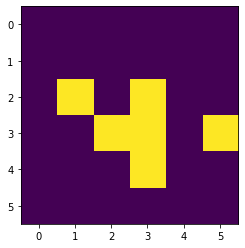

In [336]:
fig = plt.figure()
plot =plt.imshow(Z)

In [337]:
anim = FuncAnimation(fig, update, init_func=init)


In [338]:
anim.save('animation.gif', fps=1)

MovieWriter ffmpeg unavailable; using Pillow instead.
